# Lecture 1: Floating-point arithmetic, vector norms

## Syllabus

**Today:** 
- Part 1: floating point, vector norms
- Part 2: matrix norms and stability concepts

**Tomorrow:** Matrix norms and unitary matrices


## Representation of numbers

- Real numbers represent quantities: probabilities, velocities, masses, ...

<img src="./Babylonian_numerals.png" width=500>

- It is important to know, how they are represented in the computer, which only knows about bits.

## Fixed point

- The most straightforward format for the representation of real numbers is **fixed point** representation, also known as **Qm.n** format.

- A **Qm.n** number is in the range $[-(2^m), 2^m - 2^{-n}]$, with resolution $2^{-n}$.

- Total storage is $m + n + 1$ bits.

- The range of numbers represented is fixed.

## Floating point
The numbers in computer memory are typically represented as **floating point numbers** 

A floating point number is represented as  

$$\textrm{number} = \textrm{significand} \times \textrm{base}^{\textrm{exponent}},$$

where *significand* is integer, *base* is positive integer  and *exponent* is integer (can be negative), i.e.

$$ 1.2 = 12 \cdot 10^{-1}.$$

- This format has a long history. It was already used in the world's first working programmable, fully automatic digital computer [Z3](https://en.wikipedia.org/wiki/Z3_(computer)) designed in 1935 and completed in 1941 in Germany by [Konrad  Zuse](https://en.wikipedia.org/wiki/Konrad_Zuse).

## Fixed vs Floating

**Q**: What are the advantages/disadvantages of the fixed and floating points?

**A**:  In most cases, they work just fine.

- However, fixed point represents numbers within specified range and controls **absolute** accuracy.

- Floating point represent numbers with **relative** accuracy, and is suitable for the case when numbers in the computations have varying scale (i.e., $10^{-1}$ and $10^{5}$).

- In practice, if speed is of no concern, use float32 or float64.

## IEEE 754
In modern computers, the floating point representation is controlled by [IEEE 754 standard](https://en.wikipedia.org/wiki/IEEE_floating_point) which was published in **1985** and before that point different computers behaved differently with floating point numbers. 

IEEE 754 has:
- Floating point representation (as described above), $(-1)^s \times c \times b^q$.
- Two infinities, $+\infty$ and $-\infty$
- Two zeros: +0 and -0
- Two kinds of **NaN**: a quiet NaN (**qNaN**) and signalling NaN (**sNaN**) 
    - qNaN does not throw exception in the level of floating point unit (FPU), until you check the result of computations
    - sNaN value throws exception from FPU if you use corresponding variable. This type of NaN can be useful for initialization purposes
    - C++11 proposes [standard interface](https://en.cppreference.com/w/cpp/numeric/math/nan) for creating different NaNs 
- Rules for **rounding**
- Rules for $\frac{0}{0}, \frac{1}{-0}, \ldots$

Possible values are defined with
- base $b$
- accuracy $p$ - number of digits
- maximum possible value $e_{\max}$

and have the following restrictions 
- $ 0 \leq c \leq b^p - 1$
- $1 - e_{\max} \leq q + p - 1 \leq e_{\max}$ 

## The two most common format, single & double

The two most common formats, called **binary32** and **binary64** (called also **single** and **double** formats). Recently, the format **binary16** plays important role in learning deep neural networks.

| Name | Common Name | Base | Digits | Emin | Emax |
|------|----------|----------|-------|------|------|
|binary16| half precision | 2 | 11 | -14 | + 15 |
|binary32| single precision | 2 | 24 | -126 | + 127 |  
|binary64| double precision | 2 | 53 | -1022 | +1023 |  

<img src="./double64.png">

## Examples

- For a number +0
    - *sign* is 0
    - *exponent* is 00000000000
    - *fraction* is all zeros
- For a number -0
    - *sign* is 1
    - *exponent* is 00000000000
    - *fraction* is all zeros
- For +infinity
    - *sign* is 0
    - *exponent* is 11111111111
    - *fraction* is all zeros

**Q**: what about -infinity and NaN ?

## Accuracy and memory

The **relative accuracy** of single precision is $10^{-7}-10^{-8}$, while for double precision is $10^{-14}-10^{-16}$.

<font color='red'> Crucial note 1: </font> A **float16** takes **2 bytes**, **float32** takes **4 bytes**, **float64**, or double precision, takes **8 bytes.**

<font color='red'> Crucial note 2: </font> These are the only two floating point-types supported in hardware (float32 and float64) + GPU/TPU different float types are sypported.

<font color='red'> Crucial note 3: </font> You should use **double precision** in computational science and engineering and **float** on GPU/Data Science.


Also, half precision can be useful in training deep neural network, see this [paper](https://arxiv.org/pdf/1905.12334.pdf).


## How does number representation format affect training of neural networks (NN)?

- Weights in layers (fully-connected, convolutional, activation functions) can be stored with different accuracies
- It is important to improve energy efficiency of the devices that are used to train NNs
- Project [DeepFloat](https://github.com/facebookresearch/deepfloat) from Facebook demonstrates how re-develop floating point operations in a way to ensure efficiency in training NNs, more details see in this [paper](https://arxiv.org/pdf/1811.01721.pdf)
- Affect of the real number srepresentation on the gradients of activation functions

<img width=500, src="./grad_norm_fp16.png">

- And on the learning curves

<img width=500, src="./train_val_curves.png">

Plots are taken from [this paper](https://arxiv.org/pdf/1710.03740.pdf%EF%BC%89%E3%80%82)

## bfloat16 (Brain Floating Point)

- This format occupies 16 bits
    - 1 bit for sign
    - 8 bits for exponent
    - 7 bits for fraction
    <img src="./bfloat16.png">
- Truncated single precision format from IEEE standard
- What is the difference between float32 and float16?
- This format is utilized in Intel FPGA, Google TPU, Xeon CPUs and other platforms

## Tensor Float from Nvidia ([blog post about this format](https://blogs.nvidia.com/blog/2020/05/14/tensorfloat-32-precision-format/))

- Comaprison with other formats

<img src="./tensor_float_cf.png">

- Results

<img src="./TF32-BERT.png">

- PyTorch and Tensorflow supported this format are available in [Nvidia NCG](https://ngc.nvidia.com/catalog/all)

## Mixed precision ([docs from Nvidia](https://docs.nvidia.com/deeplearning/performance/mixed-precision-training/index.html))

- Main idea:
    - Maintain copy of weights in single precision
    - Then in every iteration
        - Make a copy of weights in half-precision
        - Forward pass with weights in half-precision
        - Multiply the loss by the scaling factor $S$
        - Backward pass again in half precision
        - Multiply the weight gradient with $1/S$
        - Complete the weight update (including gradient clipping, etc.)
    - Scaling factor $S$ is a hyper-parameter
    - Constant: a value so that its product with the maximum absolute gradient value is below 65504 (the maximum value representable in half precision).
    - Dynamic update based on the current gradient statistics
- Performance comparison
<img src="./mixed_precision_res.png" width=500>

- Automatic mixed-precision extensions exist to simplify turning this option on, more details [here](https://developer.nvidia.com/automatic-mixed-precision)

## Alternative to the IEEE 754 standard

Issues in IEEE 754:
- overflow to infinity or zero
- many different NaNs
- invisible rounding errors
- accuracy is very high or very poor
- subnormal numbers – numbers between 0 and minimal possible represented number, i.e. significand starts from zero

Concept of **posits** can replace floating point numbers, see [this paper](http://www.johngustafson.net/pdfs/BeatingFloatingPoint.pdf)

<img width=600 src="./posit.png">

- represent numbers with some accuracy, but provide limits of changing
- no overflows!
- example of a number representation 

<img width=600 src="./posit_example.png">

### Division accuracy demo

In [2]:
import random
import jax.numpy as jnp
import jax
from jax.config import config
config.update("jax_enable_x64", True)
#c = random.random()
#print(c)
c = jnp.float32(0.925924589693)
print(c)
a = jnp.float32(8.9)
b = jnp.float32(c / a)
print('{0:10.16f}'.format(b))
print(abs(a * b - c)/abs(c))

0.9259246
0.1040364727377892
6.437311e-08


### Square root accuracy demo

In [5]:
a = jnp.float32(1.585858)
b = jnp.sqrt(a)
print(b.dtype)
print('{0:10.64f}'.format(abs(b * b - a)/abs(a)))

float32
0.0000000751702202705928357318043708801269531250000000000000000000


### Exponent accuracy demo

In [10]:
a = jnp.float32(50.081818)
b = jnp.exp(a)
print(b.dtype)
print(jnp.log(b) - a)

float32
0.0


## Summary of demos

- For some values the inverse functions give exact answers
- The relative accuracy should be preserved due to the IEEE standard
- Does not hold for many modern GPU
- More details about adoptation of IEEE 754 standard for GPU you can find [here](https://docs.nvidia.com/cuda/floating-point/index.html#considerations-for-heterogeneous-world) 

## Loss of significance

- Many operations lead to the loss of digits [loss of significance](https://en.wikipedia.org/wiki/Loss_of_significance)
- For example, it is a bad idea to subtract two big numbers that are close, the difference will have fewer correct digits
- This is related to algorithms and their properties (forward/backward stability), which we will discuss later

## Summation algorithm

However, the rounding errors can depend on the algorithm.

- Consider the simplest problem: given $n$ floating point numbers $x_1, \ldots, x_n$  

- Compute their sum

$$S = \sum_{i=1}^n x_i = x_1 + \ldots + x_n.$$

- The simplest algorithm is to add one-by-one 

- What is the actual error for such algorithm? 

## Na&iuml;ve algorithm

Na&iuml;ve algorithm adds numbers one-by-one: 

$$y_1 = x_1, \quad y_2 = y_1 + x_2, \quad y_3 = y_2 + x_3, \ldots.$$

- The **worst-case** error is then proportional to $\mathcal{O}(n)$, while **mean-squared** error is $\mathcal{O}(\sqrt{n})$.

- The **Kahan algorithm** gives the worst-case error bound $\mathcal{O}(1)$ (i.e., independent of $n$).  

- <font color='red'> Can you find the $\mathcal{O}(\log n)$ algorithm? </font>

## Kahan summation
The following algorithm gives $2 \varepsilon + \mathcal{O}(n \varepsilon^2)$ error, where $\varepsilon$ is the machine precision.

- The reason of the loss of significance in summation is operating with numbers of different magnitude
- The main idea of Kahan summation is to keep track of small errors and aggregate them in separate variable
- This approach is called *compensated summation*

```python
s = 0
c = 0
for i in range(len(x)):
    y = x[i] - c
    t = s + y
    c = (t - s) - y
    s = t
```

- There exists more advanced tricks to process this simple operation that are used for example in ```fsum``` function from ```math``` package, implementation check out [here](https://github.com/python/cpython/blob/d267006f18592165ed97e0a9c2494d3bce25fc2b/Modules/mathmodule.c#L1087)  

In [11]:
import math

import jax.numpy as jnp
import numpy as np
import jax
from numba import jit as numba_jit

n = 10 ** 8
sm = 1e-10
x = jnp.ones(n, dtype=jnp.float32) * sm
x = jax.ops.index_update(x, [0], 1.)
true_sum = 1.0 + (n - 1)*sm
approx_sum = jnp.sum(x)
math_fsum = math.fsum(x)


@jax.jit
def dumb_sum(x):
    s = jnp.float32(0.0)
    def b_fun(i, val):
        return val + x[i] 
    s = jax.lax.fori_loop(0, len(x), b_fun, s)
    return s


@numba_jit(nopython=True)
def kahan_sum_numba(x):
    s = np.float32(0.0)
    c = np.float32(0.0)
    for i in range(len(x)):
        y = x[i] - c
        t = s + y
        c = (t - s) - y
        s = t
    return s

@jax.jit
def kahan_sum_jax(x):
    s = jnp.float32(0.0)
    c = jnp.float32(0.0)
    def b_fun2(i, val):
        s, c = val
        y = x[i] - c
        t = s + y
        c = (t - s) - y
        s = t
        return s, c
    s, c = jax.lax.fori_loop(0, len(x), b_fun2, (s, c))
    return s

k_sum_numba = kahan_sum_numba(np.array(x))
k_sum_jax = kahan_sum_jax(x)
d_sum = dumb_sum(x)
print('Error in np sum: {0:3.1e}'.format(approx_sum - true_sum))
print('Error in Kahan sum Numba: {0:3.1e}'.format(k_sum_numba - true_sum))
print('Error in Kahan sum JAX: {0:3.1e}'.format(k_sum_jax - true_sum))
print('Error in dumb sum: {0:3.1e}'.format(d_sum - true_sum))
print('Error in math fsum: {0:3.1e}'.format(math_fsum - true_sum))

/Users/i.oseledets/Downloads/yes/envs/teaching/lib/python3.8/site-packages/jax/_src/ops/scatter.py:303: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[array(seq)]` instead of `arr[seq]`. In the future this will result in a TypeError. See https://github.com/google/jax/issues/4564 for discussion of why this type of indexing is being deprecated.
  return _scatter_update(


Error in np sum: 6.0e-07
Error in Kahan sum Numba: -1.3e-07
Error in Kahan sum JAX: -1.0e-02
Error in dumb sum: -1.0e-02
Error in math fsum: 1.3e-10


## More complicated example

In [13]:
import math
test_list = [1, 1e20, 1, -1e20]
print(math.fsum(test_list))
print(jnp.sum(jnp.array(test_list)))
print(1 + 1e20 + 1 - 1e20)

2.0
0.0
0.0


## Summary of floating-point 
- You should be really careful with floating point numbers, since it may give you incorrect answers due to rounding-off errors.

- For many standard algorithms, the stability is well-understood and problems can be easily detected.

## Vectors
- In NLA we typically work not with **numbers**, but with **vectors**
- Recall that a vector in a fixed basis of size $n$ can be represented as a 1D array with $n$ numbers 
- Typically, it is considered as an $n \times 1$ matrix (**column vector**)

**Example:** 
Polynomials with degree $\leq n$ form a linear space. 
Polynomial $ x^3 - 2x^2 + 1$ can be considered as a vector $\begin{bmatrix}1 \\ -2 \\ 0 \\ 1\end{bmatrix}$ in the basis $\{x^3, x^2, x, 1\}$

## Vector norm

- Vectors typically provide an (approximate) description of a physical (or some other) object 

- One of the main question is **how accurate** the approximation is (1%, 10%)

- What is an acceptable representation, of course, depends on the particular applications. For example:
    - In partial differential equations accuracies $10^{-5} - 10^{-10}$ are the typical case
    - In data-based applications sometimes an error of $80\%$ is ok, since the interesting signal is corrupted by a huge noise

## Distances and norms

- Norm is a **qualitative measure of smallness of a vector** and is typically denoted as $\Vert x \Vert$.

The norm should satisfy certain properties:

- $\Vert \alpha x \Vert = |\alpha| \Vert x \Vert$
- $\Vert x + y \Vert \leq \Vert x \Vert + \Vert y \Vert$ (triangle inequality)
- If $\Vert x \Vert = 0$ then $x = 0$

The distance between two vectors is then defined as

$$ d(x, y) = \Vert x - y \Vert. $$

## Standard norms
The most well-known and widely used norm is **euclidean norm**:

$$\Vert x \Vert_2 = \sqrt{\sum_{i=1}^n |x_i|^2},$$

which corresponds to the distance in our real life. If the vectors have complex elements, we use their modulus.

## $p$-norm
Euclidean norm, or $2$-norm, is a subclass of an important class of $p$-norms:

$$ \Vert x \Vert_p = \Big(\sum_{i=1}^n |x_i|^p\Big)^{1/p}. $$

There are two very important special cases:
- Infinity norm, or Chebyshev norm is defined as the maximal element: 

$$ \Vert x \Vert_{\infty} = \max_i | x_i| $$

<img src="chebyshev.jpeg">

- $L_1$ norm (or **Manhattan distance**) which is defined as the sum of modules of the elements of $x$: 

$$ \Vert x \Vert_1 = \sum_i |x_i| $$
  
<img src="manhattan.jpeg">  


We will give examples where $L_1$ norm is very important: it all relates to the **compressed sensing** methods 
that emerged in the mid-00s as one of the most popular research topics.

## Equivalence of the norms
All norms are equivalent in the sense that

$$ C_1 \Vert x \Vert_* \leq  \Vert x \Vert_{**} \leq C_2 \Vert x \Vert_* $$  

for some positive constants $C_1(n), C_2(n)$, $x \in \mathbb{R}^n$ for any pairs of norms $\Vert \cdot \Vert_*$ and $\Vert \cdot \Vert_{**}$. The equivalence of the norms basically means that if the vector is small in one norm, it is small in another norm. However, the constants can be large.

## Computing norms in Python

The NumPy package has all you need for computing norms: ```np.linalg.norm``` function.


In [14]:
n = 100
a = jnp.ones(n)
b = a + 1e-3 * jax.random.normal(jax.random.PRNGKey(0), (n,))
print('Relative error in L1 norm:', jnp.linalg.norm(a - b, 1) / jnp.linalg.norm(b, 1))
print('Relative error in L2 norm:', jnp.linalg.norm(a - b) / jnp.linalg.norm(b))
print('Relative error in Chebyshev norm:', jnp.linalg.norm(a - b, jnp.inf) / jnp.linalg.norm(b, jnp.inf))

Relative error in L1 norm: 0.0008608277121789923
Relative error in L2 norm: 0.0010668749128008221
Relative error in Chebyshev norm: 0.0025285461541625647


## Unit disks in different norms

- A unit disk is a set of point such that $\Vert x \Vert \leq 1$
- For the euclidean norm a unit disk is a usual disk
- For other norms unit disks look very different

Text(0.5, 1.0, 'Unit disk in the p-th norm, $p=0.5$')

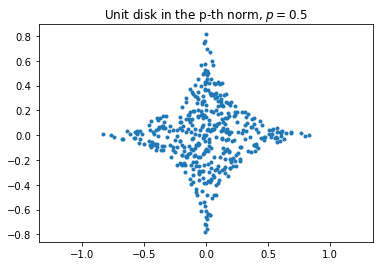

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
p = 0.5 # Which norm do we use
M = 4000 # Number of sampling points
b = []
for i in range(M):
    a = jax.random.normal(jax.random.PRNGKey(i), (1, 2))
    if jnp.linalg.norm(a[i, :], p) <= 1:
        b.append(a[i, :])
b = jnp.array(b)
plt.plot(b[:, 0], b[:, 1], '.')
plt.axis('equal')
plt.title('Unit disk in the p-th norm, $p={0:}$'.format(p))

## Why $L_1$-norm can be important?

$L_1$ norm, as it was discovered quite recently, plays an important role in **compressed sensing**. 

The simplest formulation of the considered problem is as follows:

- You have some observations $f$ 
- You have a linear model $Ax = f$, where $A$ is an $n \times m$ matrix, $A$ is **known**
- The number of equations, $n$, is less than the number of unknowns, $m$

The question: can we find the solution?

The solution is obviously non-unique, so a natural approach is to find the solution that is minimal in the certain sense:

\begin{align*}
& \Vert x \Vert \rightarrow \min_x \\
\mbox{subject to } & Ax = f
\end{align*}

- Typical choice of $\Vert x \Vert = \Vert x \Vert_2$ leads to the **linear least squares problem** (and has been used for ages).  

- The choice $\Vert x \Vert = \Vert x \Vert_1$ leads to the [**compressed sensing**](https://en.wikipedia.org/wiki/Compressed_sensing)
- It typically yields the **sparsest solution**  

## What is a stable algorithm?

And we finalize the lecture by the concept of **stability**.

- Let $x$ be an object (for example, a vector) 
- Let $f(x)$ be the function (functional) you want to evaluate 

You also have a **numerical algorithm** ``alg(x)`` that actually computes **approximation** to $f(x)$.  

The algorithm is called **forward stable**, if $$\Vert alg(x) - f(x) \Vert  \leq \varepsilon $$  

The algorithm is called **backward stable**, if for any $x$ there is a close vector $x + \delta x$ such that

$$alg(x) = f(x + \delta x)$$

and $\Vert \delta x \Vert$ is small.

## Classical example
A classical example is the **solution of linear systems of equations** using Gaussian elimination which is similar to LU factorization (more details later)

We consider the **Hilbert matrix** with the elements

$$A = \{a_{ij}\}, \quad a_{ij} = \frac{1}{i + j + 1}, \quad i,j = 0, \ldots, n-1.$$

And consider a linear system

$$Ax = f.$$

We will look into matrices in more details in the next lecture, and for linear systems in the upcoming weeks

5.0611876803438064e-08


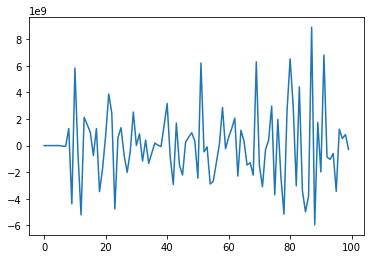

In [27]:
import numpy as np
n = 100
a = [[1.0/(i + j + 1) for i in range(n)] for j in range(n)] # Hilbert matrix
A = jnp.array(a)
#rhs =  jax.random.normal(jax.random.PRNGKey(0), (n,))
rhs = jnp.ones(n)
sol = jnp.linalg.solve(A, rhs)
print(jnp.linalg.norm(A @ sol - rhs)/jnp.linalg.norm(rhs))
plt.plot(sol)

In [60]:
rhs = jnp.ones(n)
sol = jnp.linalg.solve(A, rhs)
print(jnp.linalg.norm(A @ sol - rhs)/jnp.linalg.norm(rhs))
#plt.plot(sol)

5.0611876803438064e-08


## More examples of instability

How to compute the following functions in numerically stable manner?

- $\log(1 - \tanh^2(x))$
- $SoftMax(x)_j = \dfrac{e^{x_j}}{\sum\limits_{i=1}^n e^{x_i}}$  

In [28]:
u = 300
eps = 1e-6
print("Original function:", jnp.log(1 - jnp.tanh(u)**2))
eps_add = jnp.log(1 - jnp.tanh(u)**2 + eps)
print("Attempt imporove stability with add small constant:", eps_add)
print("Use more numerically stable form:", jnp.log(4) - 2 * jnp.log(jnp.exp(-u) + jnp.exp(u)))

Original function: -inf
Attempt imporove stability with add small constant: -13.815510557964274
Use more numerically stable form: -598.6137056388801


In [29]:
n = 5
x = jax.random.normal(jax.random.PRNGKey(0), (n, ))
x = jax.ops.index_update(x, [0], 1000)
print(jnp.exp(x) / jnp.sum(jnp.exp(x)))
print(jnp.exp(x - jnp.max(x)) / jnp.sum(jnp.exp(x - jnp.max(x))))

[nan  0.  0.  0.  0.]
[1. 0. 0. 0. 0.]


/Users/i.oseledets/Downloads/yes/envs/teaching/lib/python3.8/site-packages/jax/_src/ops/scatter.py:303: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[array(seq)]` instead of `arr[seq]`. In the future this will result in a TypeError. See https://github.com/google/jax/issues/4564 for discussion of why this type of indexing is being deprecated.
  return _scatter_update(


## Take home message
- Floating point  (double, single, number of bytes), rounding error
- Norms are measures of smallness, used to compute the accuracy
- $1$, $p$ and Euclidean norms 
- $L_1$ is used in compressed sensing as a surrogate for sparsity (later lectures) 
- Forward/backward error (and stability of algorithms)  (later lectures)